## 台中市人口管理統計平台爬取

### 本範例欲爬的目標網站：[台中市人口管理統計平台](https://demographics.taichung.gov.tw/Demographic/index.html?s=13959658)

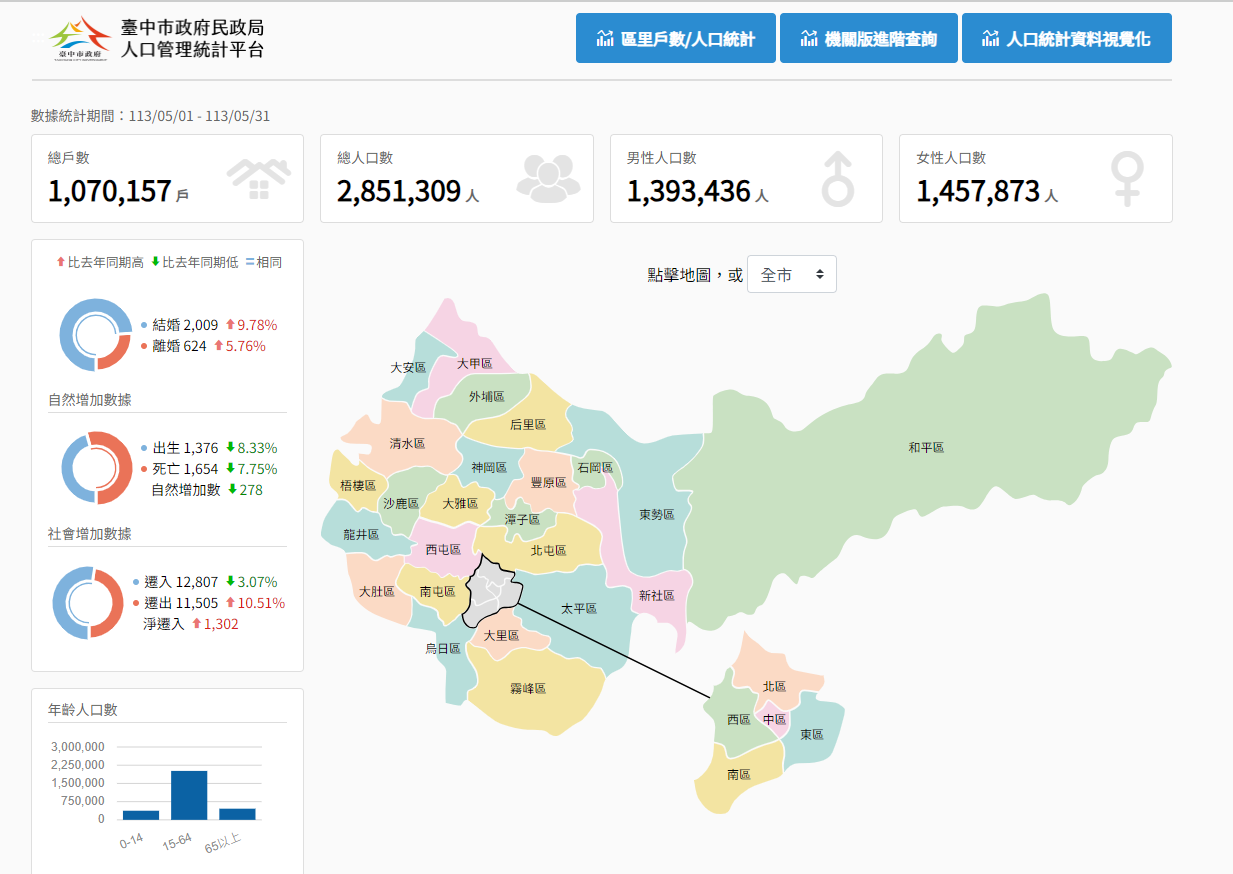

### <p style="line-height:1.6em;" align="justify;"><font color=blue>說明：這網頁要的數據是由 AngularJS [[1]](https://www.w3schools.com/angular/ng_ng-bind.asp) [[2]](https://docs.angularjs.org/api/ng/directive/ngBind) 生成，並非靜態的數據，看"網頁原始碼"（不是 F12）可以看出來，所以可以用  selenium [[1]](https://medium.com/marketingdatascience/selenium%E6%95%99%E5%AD%B8-%E4%B8%80-%E5%A6%82%E4%BD%95%E4%BD%BF%E7%94%A8webdriver-send-keys-988816ce9bed) [[2]](https://www.guru99.com/selenium-tutorial.html) 來抓。<br><br>WebDrivers 的下載與建置： [Chrome](https://chromedriver.chromium.org/)、[Edge](https://developer.microsoft.com/zh-tw/microsoft-edge/tools/webdriver/)、[Firefox](https://github.com/mozilla/geckodriver/releases)、[Safari](https://developer.apple.com/documentation/webkit/testing_with_webdriver_in_safari?changes=_2)</font></p>

#### 加裝 selenium，如果已經裝過此套件請跳過

In [ ]:
!pip install selenium --user

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
from selenium.webdriver.chrome.service import Service

#
# 台中市人口管理統計平台的網址
#
url = "https://demographics.taichung.gov.tw/Demographic/index.html?s=13959658"

#
# 啟動 Chrome driver ( 本範例中的 chromedriver.exe 與本程式在相同路徑之下 )
# 
service = Service(executable_path = './chromedriver.exe')  

browser = webdriver.Chrome(service = service)

#
# 連接台中市人口管理統計平台的網頁伺服器
#
browser.get(url)

#
# 暫停 2 秒等待全部網頁上的資料從伺服器上下載完畢
#
time.sleep(2)  

#### 有關 service 與 webdriver.Chrome() 用法，請參考 [[1]](https://www.digitalocean.com/community/questions/how-do-i-set-up-chromedriver-path-in-droplets) [[2]](https://discuss.python.org/t/unable-to-locate-or-obtain-driver-for-chrome/43323) [[3]](https://stackoverflow.com/questions/76568489/python-selenium-chromedriver-error-webdriver-init-got-an-unexpected-keywo)

# 台中市人口概況

In [ ]:
#
# 看一下 browser 可使用的方法與屬性
#
dir(browser)

In [ ]:
help(browser.find_elements)

In [ ]:
from selenium.webdriver.common.by import By

# 
# 正式擷取網頁內的台中市人口概況資料
#
items = browser.find_elements(By.CLASS_NAME, "text-shout-data.ng-binding")

#
# 列印出 items 物件的內容
#
print('\n', items, '\n', sep = '')

#
# 設定索引值
#
index = 0

for ele in items:
    
    #
    # 列印出 WebElement 元素物件內的字串
    #
    print('items[%d] = %s' % (index, ele.text))
    
    index +=  1

#### ※ 重要：參考 Selenium 新版說明 [[1*]](https://selenium-python.readthedocs.io/locating-elements.html) [[2*]](https://www.selenium.dev/documentation/webdriver/elements/finders/) [[3*]](https://www.geeksforgeeks.org/find_element_by_id-driver-method-selenium-python/) [[4]](https://stackoverflow.com/questions/72773206/selenium-python-attributeerror-webdriver-object-has-no-attribute-find-el)

In [ ]:
total_house_number = items[0].text.strip()

print("台中市總戶數：", total_house_number)

## 總人口數：

In [ ]:
total_population =  items[1].text.strip()

print("台中市總人口數：", total_population)

## 男女總人口數：

In [ ]:
total_male_population =  items[2].text.strip()

print('台中市男性人口總數：', total_male_population)

In [ ]:
total_female_population =  items[3].text.strip()

print('台中市女性人口總數:', total_female_population)

In [ ]:
#
# 關閉瀏覽器與其 driver
#
browser.quit()